In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\Geocoding_Task\Cleaned_Code\Add_4.csv')
df

,clean_line1,clean_line2,line3,city,zip_code,label,phone,year,major_city,state,...,has_phone_match,ZIP_scraped_matches_row_ids_parsed,State_scraped_matches_row_ids_parsed,City_scraped_matches_row_ids_parsed,Exit_scraped_matches_row_ids_parsed,Road_scraped_matches_row_ids_parsed,Label_scraped_matches_row_ids_parsed,Chain_scraped_matches_row_ids_parsed,Success_Match_Rate,Phone_Success_Match_Rate
0,"Coalville , 84017 Holiday Hills ( 66 )",435-336-4421 I-80 Exit 162 ( UT 280 ),MO,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2006,Coalville,UT,...,True,"[424, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True
1,"Coalville , 84017 Hills ( 66 )",435-336-4421 I-80 Holiday Exit 162 ( UT 280 ),M <U+25A1>,Coalville,84017,Hills ( 66 ),435-336-4421,2007,Coalville,UT,...,True,"[424, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True
2,"D Coalville , 84017 Holiday Hills ( 66 ) )",4 435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+2610> <U+2610> <U+2610>,Coalville,84017,Holiday Hills ( 66 ) ),435-336-4421,2008,Coalville,UT,...,True,"[424, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True
3,D Coalville ( 84017 ) Holiday Hills ( 66 ),435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+25A1> <U+2610>,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2014,Coalville,UT,...,True,"[424, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True
4,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 I-80 Exit 162 ( UT 280 ),D M <U+25A1> D D,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2015,Coalville,UT,...,True,"[424, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Corning ( 96021 ) Love's Travel Stop # 410,2 530-824-8767 I-5 Exit 630 ( South Ave ),24 XL 24 24,Corning,96021,Love's Travel Stop # 410,530-824-8767,2016,Corning,CA,...,True,"[208, 241, 270, 306, 678, 705, 729, 764]","[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23,...","[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4...",7/6 successful match,True
2329,", 96021 Flying J Travel Plaza # 0510154",CCorning 2530-824-8770 I-5 Exit 630 ( South Ave ),XL 24 45,NaN,96021,Flying J Travel Plaza # 0510154,530-824-8770,2007,Corning,CA,...,False,"[208, 241, 270, 306, 678, 705, 729, 764]","[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,...","[17, 18, 19, 20, 21, 22, 23, 156, 157, 158, 15...",6/6 successful match,False
2330,"Corning , 96021 Flying J Travel Plaza # 0510154",2 530-824-8770 I-5 Exit 630 ( South Ave ),124 HRS XL 24 HRS,Corning,96021,Flying J Travel Plaza # 0510154,530-824-8770,2008,Corning,CA,...,False,"[208, 241, 270, 306, 678, 705, 729, 764]","[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,...","[17, 18, 19, 20, 21,

In [2]:
#give me a random subset of df n=20
#df = df.sample(n=20, random_state=1)

In [3]:
import re
import random
import pandas as pd

# Function to standardize phone number to international format
def standardize_phone(phone_number):
    if pd.isna(phone_number):
        return None
    
    # Remove all non-digit characters
    digits = re.sub(r'\D', '', str(phone_number))
    
    # Make sure we have at least 10 digits
    if len(digits) < 10:
        return None
    
    # If the number starts with a 1 and has 11 digits, keep it as is
    # Otherwise, if it's 10 digits, add a 1 at the beginning
    if len(digits) == 11 and digits[0] == '1':
        return f"+{digits}"
    elif len(digits) == 10:
        return f"+1{digits}"
    elif len(digits) > 11:  # Too many digits, just use the last 10
        return f"+1{digits[-10:]}"
    else:
        return None

# Extract all unique phone numbers from the DataFrame
unique_phones = df['phone'].dropna().unique()
print(f"Total unique phone numbers before standardization: {len(unique_phones)}")

# Create a dictionary to map original phone numbers to standardized versions
phone_mapping = {}
standardized_phones = []

for phone in unique_phones:
    std_phone = standardize_phone(phone)
    if std_phone is not None:
        phone_mapping[phone] = std_phone
        standardized_phones.append(std_phone)

# Get unique standardized phone numbers
unique_standardized_phones = list(set(standardized_phones))
print(f"Total unique standardized phone numbers: {len(unique_standardized_phones)}")

# Show sample of original to standardized mapping
sample_mapping = {k: phone_mapping[k] for k in list(phone_mapping.keys())[:10]}
print("\nSample of original to standardized phone numbers:")
for orig, std in sample_mapping.items():
    print(f"{orig} -> {std}")

Total unique phone numbers before standardization: 521
Total unique standardized phone numbers: 521

Sample of original to standardized phone numbers:
435-336-4421 -> +14353364421
435-654-4642 -> +14356544642
801-936-1408 -> +18019361408
435-649-9243 -> +14356499243
435-722-9940 -> +14357229940
801-250-8585 -> +18012508585
801-508-7400 -> +18015087400
435-789-8292 -> +14357898292
801-295-3241 -> +18012953241
801-975-7188 -> +18019757188


In [4]:
import requests
import os
import time
from dotenv import load_dotenv
import json
import pandas as pd
from tqdm.notebook import tqdm

# Load API key from .env file
load_dotenv(r'C:\Users\clint\Desktop\Geocoding_Task\.env')
api_key = os.getenv('YELP_API_KEY')

# Set up the API endpoint and headers
endpoint = 'https://api.yelp.com/v3/businesses/search/phone'
headers = {
    'Authorization': f'Bearer {api_key}'
}

def fetch_yelp_business_by_phone(phone):
    """
    Fetch business information from Yelp API using phone number
    
    Args:
        phone (str): Phone number in international format (+1XXXXXXXXXX)
    
    Returns:
        dict: Dictionary containing business information or None if not found
    """
    try:
        # Make the API request
        response = requests.get(
            endpoint,
            headers=headers,
            params={'phone': phone}
        )
        
        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Error for phone {phone}: {response.status_code}")
            return None
    except Exception as e:
        print(f"Exception for phone {phone}: {str(e)}")
        return None

# Define a function to process all phone numbers in batches
def process_phone_numbers(phone_numbers, batch_size=10, delay=1):
    """
    Process a list of phone numbers and query Yelp API for each
    
    Args:
        phone_numbers (list): List of phone numbers to process
        batch_size (int): Number of phone numbers to process before saving interim results
        delay (float): Delay in seconds between API calls to avoid rate limiting
    
    Returns:
        pd.DataFrame: DataFrame containing all the results
    """
    all_results = []
    
    for i, phone in enumerate(tqdm(phone_numbers)):
        # Fetch data from Yelp API
        response_data = fetch_yelp_business_by_phone(phone)
        
        # If we got valid data and there are businesses
        if response_data and response_data.get('businesses'):
            for business in response_data['businesses']:
                result = {
                    'Original_Phone': phone,
                    'Name': business.get('name'),
                    'Rating': business.get('rating'),
                    'Review_Count': business.get('review_count'),
                    'Address': ', '.join(business.get('location', {}).get('display_address', [])),
                    'City': business.get('location', {}).get('city'),
                    'State': business.get('location', {}).get('state'),
                    'Zip_Code': business.get('location', {}).get('zip_code'),
                    'Phone': business.get('display_phone'),
                    'Categories': ', '.join([category['title'] for category in business.get('categories', [])]),
                    'Latitude': business.get('coordinates', {}).get('latitude'),
                    'Longitude': business.get('coordinates', {}).get('longitude'),
                    'Price': business.get('price', 'N/A'),
                    'Is_Closed': business.get('is_closed'),
                    'URL': business.get('url')
                }
                all_results.append(result)
        else:
            # Add a record indicating no result was found
            all_results.append({
                'Original_Phone': phone,
                'Name': None,
                'Rating': None,
                'Review_Count': None,
                'Address': None,
                'City': None,
                'State': None,
                'Zip_Code': None,
                'Phone': None,
                'Categories': None,
                'Latitude': None,
                'Longitude': None,
                'Price': None,
                'Is_Closed': None,
                'URL': None
            })
        
        # Save interim results every batch_size records
        if (i+1) % batch_size == 0:
            interim_df = pd.DataFrame(all_results)
            interim_filename = f'yelp_results_batch_{(i+1)//batch_size}.csv'
            interim_df.to_csv(interim_filename, index=False)
            print(f"Saved interim results to {interim_filename} ({i+1}/{len(phone_numbers)} processed)")
        
        # Add delay to avoid rate limiting
        time.sleep(delay)
    
    # Create final DataFrame with all results
    final_df = pd.DataFrame(all_results)
    return final_df

In [5]:
# Define batch size and delay parameters
# Using smaller batch size and larger delay to avoid rate limiting
BATCH_SIZE = 10  # Save interim results every 10 phone numbers
DELAY_SECONDS = 2  # Wait 2 seconds between API calls

# Sample a subset of phone numbers for testing (comment out for full run)
# Uncomment the next two lines if you want to test with a smaller sample first
# sample_size = min(10, len(unique_standardized_phones))
# phones_to_process = random.sample(unique_standardized_phones, sample_size)

# Process all unique phone numbers
# Comment out this line if using the sample above
phones_to_process = unique_standardized_phones

print(f"Processing {len(phones_to_process)} unique phone numbers...")

# Process all phone numbers
yelp_df = process_phone_numbers(phones_to_process, BATCH_SIZE, DELAY_SECONDS)

# Display summary of results
print("\nResults Summary:")
print(f"Total phone numbers processed: {len(phones_to_process)}")
print(f"Total businesses found: {yelp_df['Name'].notna().sum()}")
print(f"Phone numbers with no match: {yelp_df['Name'].isna().sum()}")

# Display the first few rows of the results
print("\nFirst few results:")
yelp_df.head()

Processing 521 unique phone numbers...


  0%|          | 0/521 [00:00<?, ?it/s]

Saved interim results to yelp_results_batch_1.csv (10/521 processed)
Saved interim results to yelp_results_batch_2.csv (20/521 processed)
Saved interim results to yelp_results_batch_3.csv (30/521 processed)
Saved interim results to yelp_results_batch_4.csv (40/521 processed)
Saved interim results to yelp_results_batch_5.csv (50/521 processed)
Saved interim results to yelp_results_batch_6.csv (60/521 processed)
Saved interim results to yelp_results_batch_7.csv (70/521 processed)
Saved interim results to yelp_results_batch_8.csv (80/521 processed)
Saved interim results to yelp_results_batch_9.csv (90/521 processed)
Saved interim results to yelp_results_batch_10.csv (100/521 processed)
Saved interim results to yelp_results_batch_11.csv (110/521 processed)
Saved interim results to yelp_results_batch_12.csv (120/521 processed)
Saved interim results to yelp_results_batch_13.csv (130/521 processed)
Saved interim results to yelp_results_batch_14.csv (140/521 processed)
Saved interim results to

,Original_Phone,Name,Rating,Review_Count,Address,City,State,Zip_Code,Phone,Categories,Latitude,Longitude,Price,Is_Closed,URL
0,+17754736800,Golden Gate Auto-Truck Plaza,2.4,25.0,"500 Usa Pkwy, Sparks, NV 89434",Sparks,NV,89434,(775) 473-6800,Gas Stations,39.556960,-119.491560,N/A,False,https://www.yelp.com/biz/golden-gate-auto-truc...
1,+14357434823,Shell,3.0,1.0,"885 S Park Ave, Fillmore, UT 84631",Fillmore,UT,84631,(435) 743-4823,Gas Stations,38.950331,-112.353142,N/A,False,https://www.yelp.com/biz/shell-fillmore-2?adju...
2,+15597573044,Best Truck Stop,2.2,10.0,"451 N Park Dr, Pixley, CA 93256",Pixley,CA,93256,(559) 757-3044,Gas Stations,35.972336,-119.291775,N/A,False,https://www.yelp.com/biz/best-truck-stop-pixle...
3,+13105326037,Carson Mini Truck Stop,2.8,8.0,"101 W Victoria St, Gardena, CA 90248",Gardena,CA,90248,(310) 532-6037,Gas Stations,33.865700,-118.275848,N/A,False,https://www.yelp.com/biz/carson-mini-truck-sto...
4,+14358427132,Meadow Chevron & Food Mart,4.0,1.0,"375 N Main St, Meadow, UT 84644",Meadow,UT,84644,(435) 842-7132,Convenience Stores,38.892793,-112.410616,N/A,False,https://www.yelp.com/biz/meadow-chevron-and-fo...


In [6]:
# Save the complete results to a CSV file
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')
output_file = f'yelp_businesses_all.csv'
yelp_df.to_csv(output_file, index=False)
print(f"Complete results saved to: {output_file}")

Complete results saved to: yelp_businesses_all.csv



Top Business Categories:


,Category,Count
0,Gas Stations,387
1,Convenience Stores,231
2,Fast Food,92
3,Sandwiches,50
4,Car Wash,22
5,American,21
6,Commercial Truck Repair,21
7,Mexican,21
8,Burgers,19
9,Chicken Wings,18


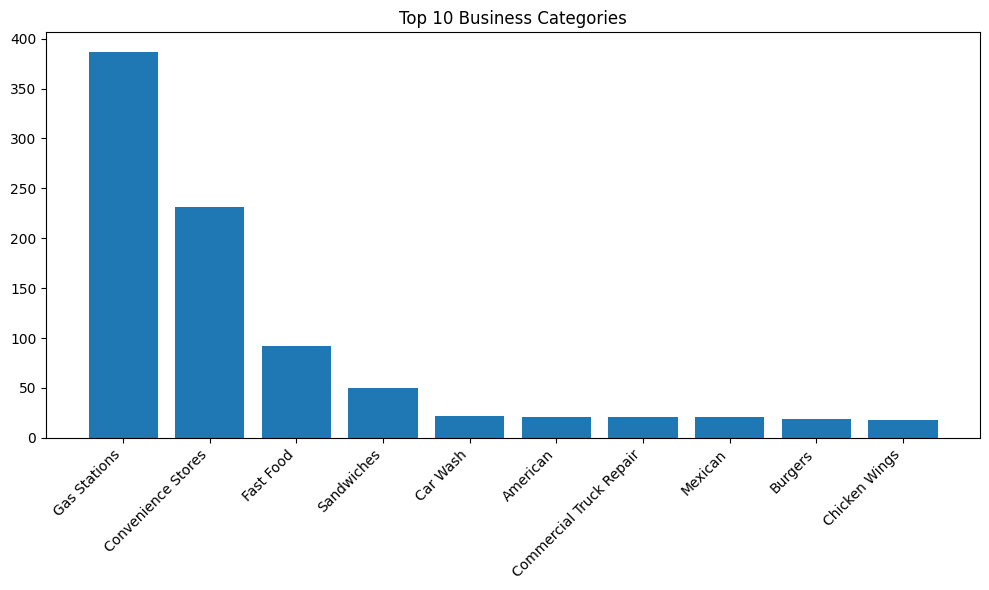


Businesses by State:


,State,Count
0,CA,336
1,AZ,124
2,UT,107
3,NV,84



Top Cities with Businesses:


,State,City,Count
17,AZ,Kingman,13
63,CA,Coalinga,13
11,AZ,Eloy,12
194,NV,Sparks,12
182,NV,Las Vegas,11
54,CA,Buttonwillow,11
231,UT,Salt Lake City,11
25,AZ,Quartzsite,10
41,CA,Arvin,10
46,CA,Bakersfield,10


In [7]:
# Analyze the categories of businesses found
if 'Categories' in yelp_df.columns and yelp_df['Categories'].notna().any():
    # Split categories and flatten the list
    all_categories = []
    for categories in yelp_df['Categories'].dropna():
        if categories:  # Check if the string isn't empty
            all_categories.extend([cat.strip() for cat in categories.split(',')])
    
    # Count occurrences of each category
    category_counts = pd.Series(all_categories).value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']
    
    # Display top categories
    print("\nTop Business Categories:")
    display(category_counts.head(15))
    
    # Optionally create a bar chart
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        top_n = 10
        plt.bar(category_counts['Category'][:top_n], category_counts['Count'][:top_n])
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} Business Categories')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create plot: {str(e)}")

# Analyze locations (states and cities)
if 'State' in yelp_df.columns and yelp_df['State'].notna().any():
    # Count businesses by state
    state_counts = yelp_df['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Count']
    
    print("\nBusinesses by State:")
    display(state_counts)
    
    # Get top cities
    if 'City' in yelp_df.columns and yelp_df['City'].notna().any():
        city_counts = yelp_df.groupby(['State', 'City']).size().reset_index(name='Count')
        city_counts = city_counts.sort_values('Count', ascending=False)
        
        print("\nTop Cities with Businesses:")
        display(city_counts.head(15))